<h1 align=center><font size = 10> ASM 2 </font></h1>

# Bài toán

Trong notebook này, chúng ta sẽ thực hành tất cả các thuật toán phân loại mà chúng ta đã học trong khóa này.

Hãy tải tập dữ liệu bằng thư viện Pandas và áp dụng các thuật toán sau rồi tìm ra thuật toán tốt nhất cho tập dữ liệu cụ thể này bằng các phương pháp đánh giá độ chính xác.

Kiểu của tập dữ liệu và bài toán là một phân loại nhị phân có giám sát cổ điển. Với một số yếu tố có các đặc điểm (đặc trưng) nhất định, chúng ta cần xây dựng mô hình ML để xác định những người bị ảnh hưởng bởi bệnh tiểu đường loại 2.

Để giải quyết vấn đề, chúng ta sẽ phải phân tích dữ liệu, thực hiện bất kỳ chuyển đổi và chuẩn hóa cần thiết nào, áp dụng thuật toán học máy, huấn luyện mô hình, kiểm tra chất lượng của mô hình đã huấn luyện và lặp lại với các thuật toán khác cho đến khi tìm ra chất lượng cao nhất cho kiểu của tập dữ liệu.

# Pipeline

1. Đọc dữ liệu.

3. Trực quan dữ liệu.

4. Tiền xử lý dữ liệu.

5. Xây dựng mô hình phân loại và đánh giá chất lượng.

  - KNN

  - Decision Tree

  - SVM

  - Logistic Regression

  - Neural Network

6. Xây dựng mô hình phân loại bằng Ensemble và đánh giá chất lượng.

  - Soft voting

  - Hard voting

7. Đưa ra kết quả tổng hợp chất lượng mô hình phân loại của tất cả thuật toán.

# Tập dữ liệu

Pima là một tộc người Mỹ bản địa sống ở Arizona. Yếu tố di truyền cho phép nhóm người này có thể tồn tại được với chế độ ăn nghèo carbohydrate trong nhiều năm. Những năm gần đây, do sự chuyển đổi đột ngột từ cây nông nghiệp truyền thống sang thực phẩm chế biến cùng với sự suy giảm hoạt động thể chất đã khiến tỷ lệ mắc bệnh tiểu đường loại 2 cao nhất, cho nên nó trở thành đối tượng của nhiều nghiên cứu.

Tập dữ liệu gồm dữ liệu từ 768 phụ nữ với 8 đặc điểm, cụ thể:

- Số lần mang thai
- Nồng độ đường huyết sau 2 giờ trong xét nghiệm dung nạp glucose đường uống
- Huyết áp tâm trương (mm Hg)
- Độ dày của nếp gấp da (mm)
- Insulin huyết thanh trong 2 giờ (mu U/ml)
- Chỉ số BMI (trọng lượng tính bằng kg/(chiều cao tính bằng m)^2)
- Chức năng phả hệ bệnh tiểu đường
- Tuổi (năm)
- Cột cuối cùng của tập dữ liệu cho biết một người có bị chẩn đoán mắc bệnh tiểu đường (1) hay không (0)

# Thư viện cần thiết

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Load dữ liệu từ file CSV  

### Task 1: Đọc dữ liệu

Do file không chứa tên cột/đặc trưng, do đó hãy thêm tên cột bằng cách sử dụng mô tả từ trang web tập dữ liệu gốc:

Tên cột lần lượt là: "NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"

In [ ]:
# Nhập code của bạn ở đây:
cols = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

df = pd.read_csv("/content/drive/MyDrive/Data Sciene Funix/303/Assignment/ASM2/pima-indians-diabetes.csv", header = None, names = cols)

df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Trực quan hóa và tiền xử lý dữ liệu



## Ma trận tương quan dữ liệu

Ma trận tương quan là một công cụ quan trọng để hiểu mối tương quan giữa các đặc điểm khác nhau. Các giá trị sẽ nằm trong khoảng từ -1 đến 1; giá trị càng gần 1 thì càng có giữa hai đặc điểm càng có mối tương quan tốt.

### Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [ ]:
# Nhập code của bạn ở đây:
corr = df.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix of Data')

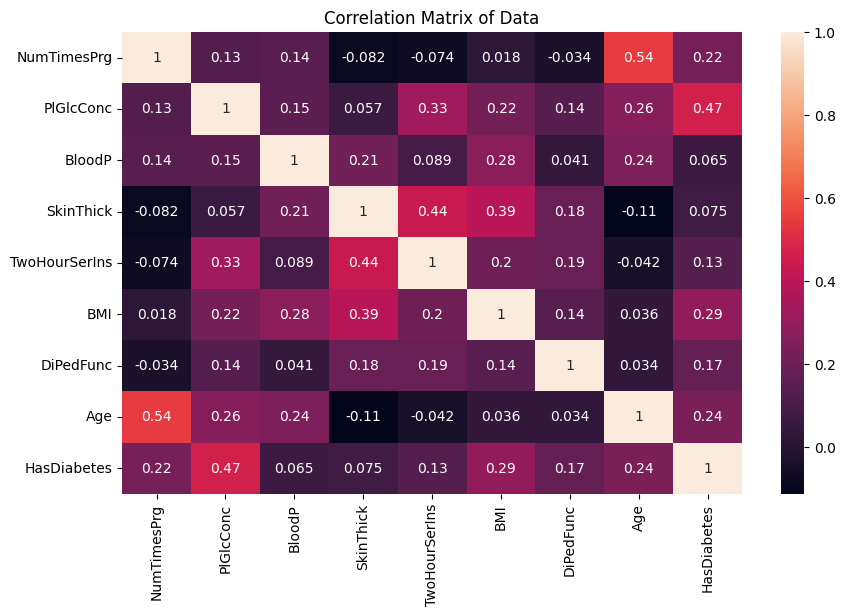

In [ ]:
# Nhập code của bạn ở đây:
# Nhập code của bạn ở đây
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, annot = True)
ax.set_title('Correlation Matrix of Data')

## Trực quan hóa tập dữ liệu

Trực quan hóa dữ liệu là một bước quan trọng của phân tích dữ liệu. Nhờ có trực quan hóa dữ liệu, chúng ta sẽ hiểu rõ hơn về các phân phối giá trị đặc trưng khác nhau: ví dụ: chúng ta nắm được độ tuổi trung bình của mọi người hoặc chỉ số BMI trung bình,...

Tất nhiên, chúng ta có thể giới hạn việc xem xét hiển thị bảng, nhưng điều này cũng đồng nghĩa với việc chúng ta có thể sẽ bỏ lỡ những yếu tố quan trọng có thể ảnh hưởng đến độ chính xác của mô hình.

### Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

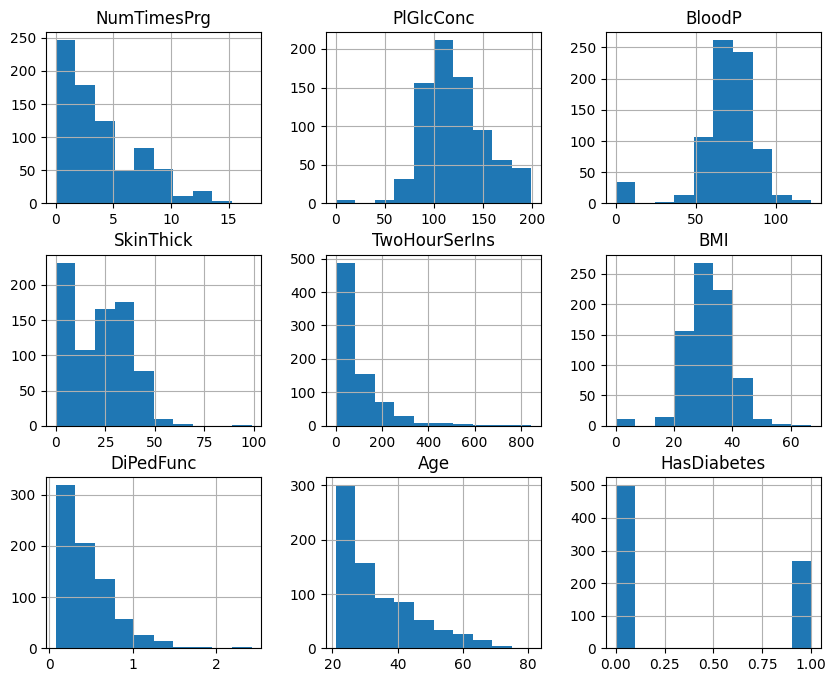

In [ ]:
# Nhập code của bạn ở đây:
df.hist(figsize=(10, 8))
plt.show()

Tôi nhận thấy trong tập dữ liệu (điều này không rõ ràng ngay từ đầu) là thực tế một số người có giá trị null (không) cho một số đặc trưng: BMI hoặc huyết áp không hoàn toàn là 0.

Làm thế nào để xử lý các giá trị tương tự? Hãy xem phần sau trong giai đoạn biến đổi dữ liệu.

## Làm sạch và biến đổi dữ liệu

Từ phân tích trước, chúng ta đã nhận thấy một số bệnh nhân bị thiếu dữ liệu ở một số đặc trưng. Các thuật toán ML hoạt động không hiệu quả khi dữ liệu bị khuyết, vì vậy chúng ta phải tìm cách để "làm sạch" dữ liệu hiện có.

Cách dễ nhất là loại bỏ tất cả những bệnh nhân có giá trị null/0, nhưng nếu làm theo cách này, chúng ta cũng sẽ loại bỏ rất nhiều dữ liệu quan trọng.

Cách khác là thay thế giá trị null/0 bằng giá trị trung bình của cột dữ liệu đó. Hãy xem làm thế nào để áp dụng phương pháp thứ hai này.

### Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

Chúng tôi chưa chuyển đổi tất cả các cột vì một số giá trị có thể là 0 (như "Số lần mang thai").

In [ ]:
# Nhập code của bạn ở đây:
df.isna().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NumTimesPrg    768 non-null    int64  
 1   PlGlcConc      768 non-null    int64  
 2   BloodP         768 non-null    int64  
 3   SkinThick      768 non-null    int64  
 4   TwoHourSerIns  768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DiPedFunc      768 non-null    float64
 7   Age            768 non-null    int64  
 8   HasDiabetes    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**As the code shown, there is no NaN value in the data. However, from the given information, the 0 value (except in the NumTimesPrg - referring to the number of times that a woman is pregnant) appears many times, which causes the noise in the data. Hence, we will replace 0 value in those cols by median value**

In [ ]:
columns_to_replace = ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns']

# Replace 0 values with median in chosen columns
for column in columns_to_replace:
    median_value = df[column].median()
    df[column] = df[column].replace(0, median_value)

df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


## Chuẩn hóa dữ liệu

Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling). Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần áp dụng một phép biến đổi thích hợp.

### Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1.

Lưu ý: Chỉ áp dụng với các đặc trưng, không áp dụng với mục tiêu.

In [ ]:
# Nhập code của bạn ở đây:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_normalize = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age"]

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1


## Phân tách dữ liệu

Bây giờ dữ liệu đã được chuyển đổi, chúng ta cần chia tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra. Phân tách tập dữ liệu là một bước rất quan trọng đối với các mô hình học máy có giám sát. Về cơ bản, chúng ta sẽ sử dụng phần đầu tiên để huấn luyện mô hình (bỏ qua cột có nhãn được gán trước), sau đó sử dụng mô hình đã huấn luyện để đưa ra dự đoán về dữ liệu mới (là tập dữ liệu kiểm tra, không phải là một phần của tập huấn luyện) và so sánh giá trị dự đoán với nhãn đã được chỉ định.

### Task 7: Tách tập dữ liệu train/test data

- test site = 20%
- random_state=7.

In [ ]:
y = df['HasDiabetes'].values

df.drop(columns = 'HasDiabetes', axis = 1, inplace = True)

In [ ]:
# Get the name of each columns left
cols_values = df.columns.values

df_with_features = df[cols_values]

X = np.asarray(df_with_features)

In [ ]:
# Print X features
X[0:5]

array([[ 0.63994726,  0.86604475, -0.03198993,  0.83111367, -0.60820096,
         0.16724016,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 ,  0.1805664 , -0.60820096,
        -0.85155088, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, -0.46998087, -0.60820096,
        -1.33183808,  0.60439732, -0.10558415],
       [-0.84488505, -1.07356674, -0.5283186 , -0.46998087, -0.00618459,
        -0.63323851, -0.92076261, -1.04154944],
       [-1.14185152,  0.50442227, -2.67907616,  0.83111367,  0.69537779,
         1.54988514,  5.4849091 , -0.0204964 ]])

In [ ]:
# Print y value - target value
y[0:5]

array([1, 0, 1, 0, 1])

In [ ]:
# Nhập code của bạn ở đây:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
print("Shape of X train", X_train.shape)
print("Shape of y train", y_train.shape)

Shape of X train (614, 8)
Shape of y train (614,)


In [ ]:
print("Shape of X test", X_test.shape)
print("Shape of y test", y_test.shape)

Shape of X test (154, 8)
Shape of y test (154,)


**Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?**

Đáp án:
- **Normalization**: The reason that we need to implement normalization before training step is that the model performs better when the input features are on a similar scale. Also, it helps prevent numerical instability, especially in algorithms that involve distance calculations or optimizations. Features with large scales might dominate the learning process

- **Split the dataset**: The main purpose of splitting the dataset is to evaluate the performance of the model. To be more specific, the model after training with the train dataset will be measured by the test dataset to re-check, avoid over-fitting/under-fitting problems. By splitting the dataset into train/test datasets, it is better for hyper-parameters tunning as well as build models that generalize well to new, unseen data.

### Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [ ]:
# Nhập code của bạn ở đây:
hasDiabetes_in_entire_datasets = np.sum(y == 1)
hasDiabetes_in_train_datasets = np.sum(y_train == 1)
hasDiabetes_in_test_datasets = np.sum(y_test == 1)

print("The number of women that has diabetes in the entire datasets:", hasDiabetes_in_entire_datasets)
print("The number of women that has diabetes in the train datasets:", hasDiabetes_in_train_datasets)
print("The number of women that has diabetes in the test datasets:", hasDiabetes_in_test_datasets)

The number of women that has diabetes in the entire datasets: 268
The number of women that has diabetes in the train datasets: 211
The number of women that has diabetes in the test datasets: 57


# Phân loại

Giờ đến lượt bạn rồi, hãy sử dụng tập huấn luyện để xây dựng một mô hình chính xác, sau đó sử dụng tập kiểm tra để báo lại độ chính xác của mô hình.

Bạn nên sử dụng các thuật toán sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural Network
- Soft voting
- Hard voting



**__ Lưu ý:__**

- Bạn phải cố gắng **TINH CHỈNH ÍT NHẤT 3 SIÊU THAM SỐ** trên mỗi thuật toán, ngoại trừ soft voting và hard voting.
- Bạn có thể lên phía trên notebook và thay đổi quá trình tiền xử lý, lựa chọn đặc trưng, trích xuất đặc trưng,... để tạo ra mô hình tốt hơn.
- Bạn nên sử dụng thư viện scikit-learn, Scipy hoặc Numpy để phát triển các thuật toán phân loại.
- Bạn nên bao gồm code của thuật toán trong các cell sau.

## Import các phép đo đánh giá

In [ ]:
from sklearn.metrics import jaccard_score, f1_score

In [ ]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


## Task 9: K Nearest Neighbor(KNN)

Tinh chỉnh siêu tham số để có được mô hình KNN với độ chính xác tốt nhất.

In ra các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình KNN.

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def grid_cv(model, model_name, params, X_train, y_train, X_test, y_test, f1_scores, jaccard_scores, print_result = True):
  print("Model using:", model_name)
  clf = GridSearchCV(model, params)
  clf.fit(X_train, y_train)
  print("Best paramters selection: ", clf.best_params_)
  print("\n")

  for i, x, y in zip(["train", "test"], [X_train, X_test], [y_train, y_test]):
    f1_scores[i][model_name] = round(f1_score(y, clf.predict(x)), 5)
    jaccard_scores[i][model_name] = round(jaccard_score(y, clf.predict(x)), 5)

  if print_result:
    print("F1 score for train set using", model_name, ":", f1_scores["train"][model_name])
    print("F1 score for test set using", model_name, ":", f1_scores["test"][model_name])
    print("\n")
    print("Jaccard score for train set using", model_name, ":", jaccard_scores["train"][model_name])
    print("Jaccard score for test set using", model_name, ":", jaccard_scores["test"][model_name])

In [ ]:
# Nhập code của bạn ở đây:

# Define KNN params for the created function
knn_model = KNeighborsClassifier()
model_name = "KNN"

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_cv(knn_model, model_name, param_grid, X_train, y_train, X_test, y_test, f1_scores, jaccard_scores)

Model using: KNN
Best paramters selection:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


F1 score for train set using KNN : 0.67187
F1 score for test set using KNN : 0.70707


Jaccard score for train set using KNN : 0.50588
Jaccard score for test set using KNN : 0.54688


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN.**

Trả lời:

- **n_neighbors**: This parameter determines the number of neighboring points considered for each data point in the K-nearest neighbors (KNN) algorithm. Essentially, it defines the size of the local neighborhood around a point by specifying how many closest points should influence the prediction for that point

- **weight**: The choice of weight in KNN influences how each point in the neighborhood contributes to the decision-making process. "Uniform" weight assigns equal importance to all points within the neighborhood, treating them with equal influence. On the other hand, "Distance" weight prioritizes closer neighbors by assigning higher weights to them. This means that the proximity of a neighbor to a given point directly correlates with its impact on the prediction, introducing a form of distance-based weighting

- **p**: The parameter 'p' in KNN corresponds to the distance calculation metric employed by the algorithm. When 'p' is set to 1, KNN utilizes the Manhattan distance metric. Manhattan distance is computed as the sum of the absolute differences between corresponding coordinates of two points. Conversely, when 'p' is set to 2 (which is the default), KNN adopts the Euclidean distance metric. Euclidean distance represents the straight-line distance between two points in the feature space, calculated as the square root of the sum of squared differences between corresponding coordinates. Essentially, the choice of 'p' determines the nature of the distance measurement employed by KNN, shaping its sensitivity to the spatial relationships between data points


## Task 10: Decision Tree

Tinh chỉnh siêu tham số để có được mô hình DT với độ chính xác tốt nhất.

In ra các giá trị siêu tham số của mô hình DT với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình DT.

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [ ]:
from sklearn import tree

In [ ]:
#Nhập code của bạn ở đây:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree params for the created function
dt_model = DecisionTreeClassifier()
model_name = "DT"

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_cv(dt_model, model_name, param_grid, X_train, y_train, X_test, y_test, f1_scores, jaccard_scores)

Model using: DT
Best paramters selection:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 15}


F1 score for train set using DT : 0.74766
F1 score for test set using DT : 0.69919


Jaccard score for train set using DT : 0.59701
Jaccard score for test set using DT : 0.5375


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán DT.**

Đáp án:

- criterion: Algorithm to measure the quality of a split (the impurity).
- max_depth: The maximum depth of a tree
- min_samples_leaf: The minimum number of samples required to split an internal node. It means that it requires the samples greater than this number to split further
- min_samples_split: The minimum number of samples required to form a leaf node in the tree. It means that it requires greater than this number to form a leaf, no matter what min_samples_leaf is.

## Task 11: Support Vector Machine

Tinh chỉnh siêu tham số để có được mô hình SVM với độ chính xác tốt nhất.

In ra các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình SVM.

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Nhập code của bạn ở đây:

svm_model = SVC()
model_name = "SVM"

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Specifies the kernel type to be used in the algorithm
}

grid_cv(svm_model, model_name, param_grid, X_train, y_train, X_test, y_test, f1_scores, jaccard_scores)



Model using: SVM
Best paramters selection:  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


F1 score for train set using SVM : 0.625
F1 score for test set using SVM : 0.64646


Jaccard score for train set using SVM : 0.45455
Jaccard score for test set using SVM : 0.47761


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM.**

- C: This is the regularization parameter. Small C values lead to strong regularization, creating a simpler model that may generalize better. Larger C values allow the model more freedom, potentially leading to a more complex model aiming to classify all training examples correctly.

- gamma: Specific to the 'rbf' kernel, gamma influences the impact of a single training example. Low gamma values result in a broader influence, considering points farther from the separation line. High gamma localizes the influence of support vectors, leading to a more complex decision boundary.

- kernel: Specifies the type of hyperplane. 'linear' uses a linear hyperplane (a line in 2D data), while 'rbf' uses a radial basis function for a non-linear hyperplane.

## Task 12: Logistic Regression

Tinh chỉnh siêu tham số để có được mô hình LR với độ chính xác tốt nhất.

In ra các giá trị siêu tham số của mô hình LR với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình LR.

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Nhập code của bạn ở đây:
log_model = LogisticRegression()

model_name = "LR"

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # The norm used in the penalization
    'solver': ['liblinear']  # Algorithm to use in the optimization problem
}

grid_cv(log_model, model_name, param_grid, X_train, y_train, X_test, y_test, f1_scores, jaccard_scores)

Model using: LR
Best paramters selection:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


F1 score for train set using LR : 0.63807
F1 score for test set using LR : 0.65347


Jaccard score for train set using LR : 0.4685
Jaccard score for test set using LR : 0.48529


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán LR.**

- C: Similar to the SVM's C parameter, it represents the inverse of regularization strength. Smaller values indicate stronger regularization.

- penalty: Dictates the type of regularization used in the model—L1 (Lasso) and L2 (Ridge). L1 encourages sparse models with some coefficients becoming zero, while L2 doesn't promote sparsity but shrinks coefficients evenly.

- solver: Specifies the optimization algorithm. For instance, the 'liblinear' solver is suitable for small datasets and binary classification. It supports both L1 and L2 penalties.

## Task 13: Neural Network

Tinh chỉnh siêu tham số để có được mô hình NN với độ chính xác tốt nhất.

In ra các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình NN.

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Nhập code của bạn ở đây:
mlp_model = MLPClassifier(max_iter=600, early_stopping = True)
model_name = "NN"

param_grid = {
    'hidden_layer_sizes': [(8, 16, 8), (16, 16, 8), (16, 32, 16), (16, 16)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [16, 32, 64, 128]
}

grid_cv(mlp_model, model_name, param_grid, X_train, y_train, X_test, y_test, f1_scores, jaccard_scores)

Model using: NN
Best paramters selection:  {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 16, 'hidden_layer_sizes': (16, 16), 'learning_rate': 'adaptive', 'solver': 'adam'}


F1 score for train set using NN : 0.63753
F1 score for test set using NN : 0.71154


Jaccard score for train set using NN : 0.46792
Jaccard score for test set using NN : 0.55224


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán NN.**

- hidden_layer_sizes: Specifies the number of units in each hidden layer (excluding input and output layers).

- activation: Chooses the activation function, either 'tanh' or 'relu'.

- solver: Determines the optimization algorithm.

- alpha: Controls the strength of L2 regularization.

- learning_rate: Manages the learning rate schedule. 'constant' keeps it fixed, while 'adaptive' adjusts it based on training loss and validation score changes.

- batch_size: Sets the size of minibatches for stochastic optimizers.

- max_iter: Defines the maximum number of iterations. For stochastic solvers ('sgd', 'adam'), it corresponds to the number of epochs.

- early_stopping: If set to true, enables early stopping based on validation score. Stops training when the score does not improve by at least a tolerance value for consecutive epochs. Only applicable when using 'sgd' or 'adam' solvers.

## Task 14: Soft Voting Ensemble

Điều chỉnh trọng số trong Soft Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình soft voting ensembling model.

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.66**, Jaccard similarity score phải lớn hơn **0.5**.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Nhập code của bạn ở đây:
log_clf = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
svm_clf = SVC(C = 0.1, gamma = 1, kernel = 'linear', probability=True)
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 6, min_samples_split = 15)
mlp_clf = MLPClassifier(activation = 'tanh', alpha = 0.0001, batch_size = 64, hidden_layer_sizes = (16, 32, 16), learning_rate = 'adaptive', solver = 'adam', max_iter=600, early_stopping=True)
knn_clf = KNeighborsClassifier(n_neighbors = 9, p = 1, weights = 'uniform')

# Create the VotingClassifier with the base models
soft_voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svm', svm_clf),
        ('dt', tree_clf),
        ('mlp', mlp_clf),
        ('knn', knn_clf)
    ],
    voting='soft'
)

# Define the hyperparameters for GridSearchCV
param_grid = {
    'weights': [None, [2, 1, 1, 2, 3], [1, 2, 1, 2, 1], [2, 1, 2, 3, 1]],
}

model_name = 'EN_SOFT'

grid_cv(soft_voting_clf, model_name, param_grid, X_train, y_train, X_test, y_test, f1_scores, jaccard_scores)


Model using: EN_SOFT
Best paramters selection:  {'weights': None}


F1 score for train set using EN_SOFT : 0.68241
F1 score for test set using EN_SOFT : 0.70588


Jaccard score for train set using EN_SOFT : 0.51793
Jaccard score for test set using EN_SOFT : 0.54545


**Explanation of Parameters:**
- For 5 chosen models, I have explain each of the parameters previously. I set the value for each parameter based on the best parameters reported after using GridSearchCV

- voting: Voting strategy. In this case is soft voting, which means the output class is the prediction based on the average of probability given to that class

- weight: Weight assigned to each classifier when voting='soft'. The weights parameter allows you to assign different importance levels to the predictions of each classifier in the soft voting scheme

## Task 15: Hard Voting Ensemble

Điều chỉnh trọng số trong Hard Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình hard voting ensembling model.

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.57**, Jaccard similarity score phải lớn hơn **0.45**.

In [ ]:
# Nhập code của bạn ở đây:
log_clf = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
svm_clf = SVC(C = 0.1, gamma = 1, kernel = 'linear', probability=True)
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 6, min_samples_split = 15)
mlp_clf = MLPClassifier(activation = 'tanh', alpha = 0.0001, batch_size = 64, hidden_layer_sizes = (16, 32, 16), learning_rate = 'adaptive', solver = 'adam', max_iter=600, early_stopping=True)
knn_clf = KNeighborsClassifier(n_neighbors = 9, p = 1, weights = 'uniform')

# Create the VotingClassifier with the base models
soft_voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svm', svm_clf),
        ('dt', tree_clf),
        ('mlp', mlp_clf),
        ('knn', knn_clf)
    ],
    voting='hard'
)

# Define the hyperparameters for GridSearchCV
param_grid = {
    'weights': [None, [2, 1, 1, 2, 3], [1, 2, 1, 2, 1], [2, 1, 2, 3, 1]],
}

model_name = 'EN_HARD'

grid_cv(soft_voting_clf, model_name, param_grid, X_train, y_train, X_test, y_test, f1_scores, jaccard_scores)


Model using: EN_HARD
Best paramters selection:  {'weights': [1, 2, 1, 2, 1]}


F1 score for train set using EN_HARD : 0.6383
F1 score for test set using EN_HARD : 0.68


Jaccard score for train set using EN_HARD : 0.46875
Jaccard score for test set using EN_HARD : 0.51515


**Explanation of Parameters:**
- For 5 chosen models, I have explain each of the parameters previously. I set the value for each parameter based on the best parameters reported after using GridSearchCV

- voting: Voting strategy. In this case is hard voting, which means the predicted output class is determined by selecting the class with the highest majority of votes. Each classifier in the ensemble contributes one vote for its predicted class, and the class that receives the most votes across all classifiers is chosen as the final predicted output

- weight: Weight assigned to each classifier when voting='hard'. The weights parameter allows you to assign different importance levels to the predictions of each classifier in the soft voting scheme

# Báo cáo
Bạn có thể tường thuật độ chính xác của mô hình đã xây bằng cách sử dụng các phép đo đánh giá khác nhau:

| Algorithm | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|-----------|------------------|-------------------|----------------|------------------|
| KNN | ? | ? |  ? |  ? |
| Decision Tree | ? | ? |  ? |  ? |
| SVM | ? | ? |  ? |  ? |
| Logistic Regression| ? | ? |  ? |  ? |   
| Neural Network| ? | ? |  ? |  ? |
| Hard Voting | ? | ? |  ? |  ? |
| Soft Voting | ? | ? |  ? |  ? |


## Task 16: Tạo data frame mô tả kết quả chính xác như trên.

In [ ]:
# Nhập code của bạn ở đây:
for i in f1_scores.items():
  print(i)

('train', {'KNN': 0.67187, 'DT': 0.74766, 'SVM': 0.625, 'LR': 0.63807, 'NN': 0.55952, 'EN_HARD': 0.6383, 'EN_SOFT': 0.68241})
('test', {'KNN': 0.70707, 'DT': 0.69919, 'SVM': 0.64646, 'LR': 0.65347, 'NN': 0.53933, 'EN_HARD': 0.68, 'EN_SOFT': 0.70588})


In [ ]:
# Convert dict to df
f1_scores_df = pd.DataFrame(f1_scores)
jaccard_scores_df = pd.DataFrame(jaccard_scores)

# Rename f1 score df
f1_scores_df_renamed = f1_scores_df.rename(columns={'train' : 'F1_score_training', 'test' : 'F1_score_testing'})
f1_scores_df_renamed.index.name = 'Model'
f1_scores_df_renamed.reset_index(inplace = True)

# Rename jaccard score df
jaccard_scores_df_renamed = jaccard_scores_df.rename(columns={'train' : 'Jaccard_training', 'test' : 'Jaccard_testing'})
jaccard_scores_df_renamed.index.name = 'Model'
jaccard_scores_df_renamed.reset_index(inplace = True)

# Merge 2 dataframe
joined_df = f1_scores_df_renamed.join(jaccard_scores_df_renamed.set_index('Model'), on='Model', lsuffix='_f1_scores_df', rsuffix='_jaccard_scores_df')

# Swapping columns in joined_df
cols = list(joined_df.columns)
cols[2], cols[3] = cols[3], cols[2]
joined_df = joined_df[cols]

# Set full name of model
names_model = ["KNN", "Decision Tree", "SVM", "Logistic Regression", "Neural Network", "Hard Voting", "Soft Voting"]
joined_df["Model"] = names_model

# Display joined_df
joined_df

,Model,F1_score_training,Jaccard_training,F1_score_testing,Jaccard_testing
0,KNN,0.67187,0.50588,0.70707,0.54688
1,Decision Tree,0.74766,0.59701,0.69919,0.53750
2,SVM,0.62500,0.45455,0.64646,0.47761
3,Logistic Regression,0.63807,0.46850,0.65347,0.48529
4,Neural Network,0.55952,0.38843,0.53933,0.36923
5,Hard Voting,0.63830,0.46875,0.68000,0.51515
6,Soft Voting,0.68241,0.51793,0.70588,0.54545


**Câu hỏi: Có phải các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ không? Nếu không, hãy giải thích tại sao?**

**Trả lời: No**

**Explanation:** Ensemble methods, although often regarded as powerful tools in enhancing predictive performance, do not universally surpass individual models. Their superiority hinges on various factors, such as task complexity, dataset characteristics, and the efficacy of hyperparameter tuning. In specific scenarios, a meticulously tuned single model may exhibit comparable or even superior performance to ensemble counterparts, particularly in less intricate tasks.

A compelling illustration supporting this assertion is evident in the outcomes derived from the **"joined_df"** dataframe above. Notably, the KNN model attains a remarkable F1 score of nearly 70.7% and a Jaccard score of 54.7% on the test dataset. Intriguingly, these metrics outshine the F1 score and Jaccard score achieved by both the Hard Voting Ensemble model as well as the Soft Voting Ensemble on the same test dataset. Finally, the KNN model emerges as the top performer, boasting the highest F1 score at 70.7% and a Jaccard score of 54.7% compared to other models.

To sum up, a single model with well hyper-parameters tuning might result the same or better than ensemble models in some cases and ensemble models are not always better than single models